In [16]:
from sklearn import datasets
import numpy as np

# Irisデータセットをロード
iris = datasets.load_iris()

# 3, 4列目の特徴量を抽出
x = iris.data[:, [2, 3]]

# クラスラベルを取得
y = iris.target

print("Class labels:", np.unique(y))
# print(x)
print(y)

Class labels: [0 1 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
from sklearn.cross_validation import train_test_split

# トレーニングデータとテストデータ二分割
# 全体の30%をテストデータとする
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0)
#print(y_train)
#print(y_test)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)

# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#print(X_train_std)

In [19]:
from sklearn.linear_model import Perceptron

#  エポック数40, 学習率0.1でパーセプトロンのインスタンスを生成
# n_iter: エポック数（データセットのトレーニング回数）
# eta0: 学習率
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0, shuffle=True)

# トレーニングデータをモデルに適合させる　<- 数式完成？
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [20]:
# テストデータで予測を実施
y_pred = ppn.predict(X_test_std)
#print(y_test)
#print(y_pred)

# 誤分類のサンプルの個数を表示
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [21]:
from sklearn.metrics import accuracy_score
# 分類の正解率を表示
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [22]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    # 各特徴量を１次元配列に変換して予測を実行
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドんポイントのデータサイズに変換
    z = z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx), 
                   marker=markers[idx], label=cl)
    # テストサンプルを目立たせる（点を○で表示）
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidths=1, marker='o',
                   s=55, label='test set')

結果 として 得 られ た グラフ から わかる よう に、 3 つ の 品種 を 線形 の 決定 境界 で 完全 に 区切る こと が でき ない。

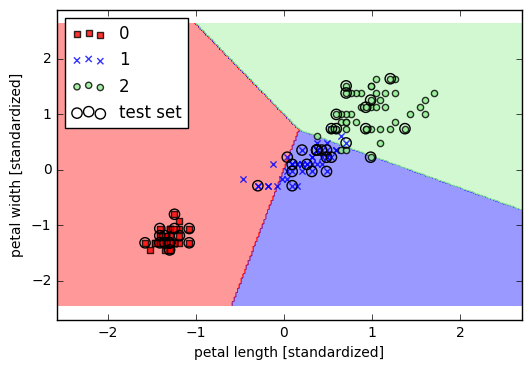

In [23]:
# トレーニングデータとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))

# トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))

# 決定境界のプロット
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, 
                      test_idx=range(105, 150))

# 軸のラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.show()